In [ ]:
#mount drive to access data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Libraries

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import re

from scipy.stats import norm
import statistics
import scipy.stats as stats
from matplotlib.pyplot import figure

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, accuracy_score,plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score


import plotly.graph_objs as go
import plotly.express as px
import plotly.offline as py

from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz

%matplotlib inline

import itertools
from subprocess import call
from IPython.display import Image

import warnings
warnings.simplefilter(action='ignore', category=Warning)

#knn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn_pandas import DataFrameMapper
from mlxtend.evaluate import bootstrap_point632_score



# Functions

In [ ]:
# confusion matrix function

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function plots the confusion matrix.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#Loading in the csv file
df_soccer =pd.read_csv('/content/drive/Shareddrives/MADS 599 Capstone!!!/Soccer'
                       + ' Dataset/fifa_data_cleaned.csv')

In [ ]:
#viewing data
df_soccer.head(10)

,ID,Age,Overall,Potential,Value,Wage,height,weight,crossing,finishing,...,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,weak_foot,skill_move,international_reputation,work_rate,Position_Category,body_type_clean
0,261188,22,71,81,4200000.0,16000.0,180.0,70.0,52,72,...,7,15,8,1,3.0,4.0,1.0,6,0,0
1,240833,17,71,89,4700000.0,6000.0,175.0,73.0,44,76,...,11,10,13,0,4.0,4.0,1.0,7,1,1
2,183569,33,75,75,3600000.0,50000.0,191.0,90.0,65,74,...,9,16,6,1,4.0,3.0,2.0,2,1,1
3,236524,23,72,82,4900000.0,16000.0,195.0,84.0,45,26,...,8,11,9,1,3.0,2.0,1.0,8,2,0
4,256790,19,82,91,66000000.0,43000.0,184.0,72.0,66,76,...,8,8,11,1,4.0,5.0,1.0,8,0,0
5,246191,22,78,86,32000000.0,100000.0,173.0,71.0,75,80,...,8,15,6,1,4.0,4.0,1.0,0,1,1
6,247635,21,78,86,31500000.0,42000.0,183.0,70.0,69,72,...,8,14,8,1,5.0,4.0,1.0,8,1,1
7,268438,18,64,84,1600000.0,9000.0,180.0,70.0,61,62,...,14,13,7,1,4.0,3.0,1.0,2,1,0
8,222724,25,73,76,4000000.0,32000.0,166.0,70.0,70,65,...,8,16,15,0,4.0,4.0,1.0,2,0,2
9,191089,29,66,66,850000.0,4000.0,191.0,90.0,62,67,...,6,10,12,1,3.0,3.0,1.0,2,1,1


In [ ]:
#getting unique
df_soccer['Position_Category'].unique()

array([0, 1, 2, 3])

In [ ]:
# source: https://stackoverflow.com/questions/38250440/error-in-na-fail-default-missing-values-in-object-but-no-missing-values 

#Function to clean the dataset that we missed in EDA
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df need to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
#Checking for values that is not a number
np.all(np.isfinite(df_soccer))

False

In [ ]:
#applying clean dataset function
clean_dataset(df_soccer)

,ID,Age,Overall,Potential,Value,Wage,height,weight,crossing,finishing,...,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,weak_foot,skill_move,international_reputation,work_rate,Position_Category,body_type_clean
0,261188.0,22.0,71.0,81.0,4200000.0,16000.0,180.0,70.0,52.0,72.0,...,7.0,15.0,8.0,1.0,3.0,4.0,1.0,6.0,0.0,0.0
1,240833.0,17.0,71.0,89.0,4700000.0,6000.0,175.0,73.0,44.0,76.0,...,11.0,10.0,13.0,0.0,4.0,4.0,1.0,7.0,1.0,1.0
2,183569.0,33.0,75.0,75.0,3600000.0,50000.0,191.0,90.0,65.0,74.0,...,9.0,16.0,6.0,1.0,4.0,3.0,2.0,2.0,1.0,1.0
3,236524.0,23.0,72.0,82.0,4900000.0,16000.0,195.0,84.0,45.0,26.0,...,8.0,11.0,9.0,1.0,3.0,2.0,1.0,8.0,2.0,0.0
4,256790.0,19.0,82.0,91.0,66000000.0,43000.0,184.0,72.0,66.0,76.0,...,8.0,8.0,11.0,1.0,4.0,5.0,1.0,8.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17623,248278.0,18.0,60.0,76.0,375000.0,1000.0,190.0,75.0,31.0,27.0,...,7.0,7.0,6.0,0.0,3.0,2.0,1.0,8.0,2.0,1.0
17624,248280.0,25.0,53.0,56.0,120000.0,500.0,169.0,65.0,50.0,46.0,...,10.0,13.0,7.0,1.0,3.0,2.0,1.0,6.0,0.0,1.0
17625,248282.0,29.0,55.0,55.0,120000.0,500.0,164.0,60.0,47.0,49.0,...,8.0,8.0,10.0,1.0,3.0,2.0,1.0,2.0,0.0,1.0
17626,248283.0,19.0,54.0,73.0,250000.0,500.0,185.0,70.0,11.0,6.0,...,55.0,53.0,55.0,1.0,2.0,1.0,1.0,8.0,3.0,0.0


In [ ]:
#drop ID and overall
df_soccer = df_soccer.drop(['ID', 'Overall'], axis = 1)

### Defining Predictors and outcomes

In [ ]:
# Defining Predictors and outcome variable
x = df_soccer.drop(['Position_Category'], axis = 1)
y = df_soccer['Position_Category']

### Select From Model

In [ ]:
#normalizing the feature variables
X_norm = MinMaxScaler().fit_transform(x)

sel_ = SelectFromModel(Lasso(alpha=.0001, random_state=123)) 
sel_.fit(X_norm, y)

SelectFromModel(estimator=Lasso(alpha=0.0001, random_state=123))

In [ ]:
#Getting best features
sel = x.columns[(sel_.get_support())]

print('total features: {}'.format((x.shape[1])))
print('selected features: {}'.format(len(sel)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 46
selected features: 42
features with coefficients shrank to zero: 4


In [ ]:
#Checking best features results
sel

Index(['Age', 'Potential', 'Wage', 'height', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'dribbling', 'curve',
       'fk_accuracy', 'long_passing', 'ball_control', 'shot_power', 'jumping',
       'stamina', 'strength', 'long_shots', 'aggression', 'positioning',
       'vision', 'penalties', 'composure', 'defensive_awareness',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'preferred_foot',
       'weak_foot', 'skill_move', 'work_rate', 'body_type_clean'],
      dtype='object')

In [ ]:
#Storing best features
best_x = df_soccer[['Age', 'Potential', 'Wage', 'height', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'dribbling', 'curve',
       'fk_accuracy', 'long_passing', 'ball_control', 'shot_power', 'jumping',
       'stamina', 'strength', 'long_shots', 'aggression', 'positioning',
       'vision', 'penalties', 'composure', 'defensive_awareness',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'preferred_foot',
       'weak_foot', 'skill_move', 'work_rate', 'body_type_clean']]

In [ ]:
#getting features information
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17459 entries, 0 to 17627
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       17459 non-null  int64  
 1   Potential                 17459 non-null  int64  
 2   Value                     17459 non-null  float64
 3   Wage                      17459 non-null  float64
 4   height                    17459 non-null  float64
 5   weight                    17459 non-null  float64
 6   crossing                  17459 non-null  int64  
 7   finishing                 17459 non-null  int64  
 8   heading_accuracy          17459 non-null  int64  
 9   short_passing             17459 non-null  int64  
 10  volleys                   17459 non-null  float64
 11  acceleration              17459 non-null  int64  
 12  sprint_speed              17459 non-null  int64  
 13  agility                   17459 non-null  int64  
 14  reacti

Baseline Logisitic Regression Model

In [ ]:
#applying train test split with 30% testing 70% training
X_train, X_test, y_train, y_test = train_test_split(x,
            y,test_size=0.3,random_state=0)

In [ ]:
#Logistic Regression
#Training data using Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

Confusion matrix, without normalization
[[4392   62   35    0]
 [2487   60   19    0]
 [3763   60   44    0]
 [1249   21   29    0]]


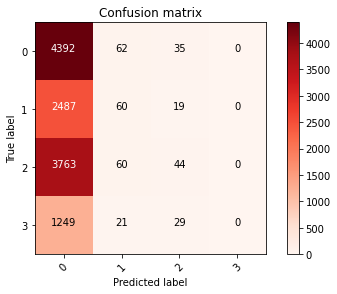

In [ ]:
#Prediction result on train data with confusion matrix
prediction = lr.predict(X_train)
cm = confusion_matrix(y_train, prediction)
plot_confusion_matrix(cm, classes=[0,1,2,3])

In [ ]:
#viewinf train result accuracy
rint(classification_report(y_train, prediction))

              precision    recall  f1-score   support

           0       0.37      0.98      0.54      4489
           1       0.30      0.02      0.04      2566
           2       0.35      0.01      0.02      3867
           3       0.00      0.00      0.00      1299

    accuracy                           0.37     12221
   macro avg       0.25      0.25      0.15     12221
weighted avg       0.31      0.37      0.21     12221



Confusion matrix, without normalization
[[1933   23    8    0]
 [1105   26    4    0]
 [1498   22   18    0]
 [ 582    9   10    0]]


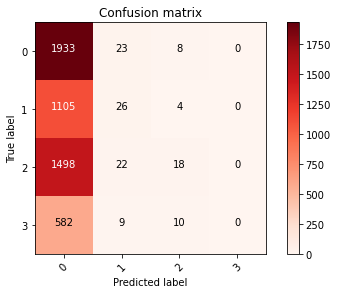

In [ ]:
#Prediction result on test data with confusion matrix
prediction = lr.predict(X_test)
cm = confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=[0,1,2,3])

# splitting the data into train test split

In [ ]:
# splitting the data 
X_train, X_test, y_train, y_test = train_test_split(best_x,
            y,test_size=0.3,random_state=0)

In [ ]:
# verify the shape
X_train.shape, X_test.shape

((12221, 42), (5238, 42))

In [ ]:
#verify the shape
y_train.shape, y_test.shape

((12221,), (5238,))

In [ ]:
# instantiate the scaler
scaler = MinMaxScaler()

#fit the scaler
scaler.fit(X_train)

# scale the data
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
#getting shape of normalized split on test data
scaled_X_test.shape, y_test.shape

((5238, 42), (5238,))

In [ ]:
#getting shape of normalized split on train data
scaled_X_train.shape, scaled_X_test.shape

((12221, 42), (5238, 42))

In [ ]:
# Looking at the scaled data as dataframe
scaled_X_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
scaled_X_test = pd.DataFrame(scaled_X_test, columns=X_test.columns)

In [ ]:
#viewing normalized features
scaled_X_train.head()

,Age,Potential,Wage,height,crossing,finishing,heading_accuracy,short_passing,volleys,acceleration,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,weak_foot,skill_move,work_rate,body_type_clean
0,0.129032,0.404255,0.001190,0.26,0.430233,0.406593,0.390805,0.554217,0.425287,0.761905,...,0.134831,0.079545,0.119565,0.056180,0.112360,1.0,0.75,0.50,0.25,0.333333
1,0.129032,0.404255,0.004762,0.50,0.406977,0.582418,0.528736,0.506024,0.505747,0.702381,...,0.134831,0.125000,0.065217,0.112360,0.123596,1.0,0.50,0.25,1.00,0.333333
2,0.096774,0.404255,0.002381,0.34,0.372093,0.483516,0.367816,0.542169,0.413793,0.738095,...,0.123596,0.113636,0.043478,0.112360,0.134831,1.0,0.50,0.25,0.25,0.000000
3,0.096774,0.489362,0.002381,0.64,0.325581,0.142857,0.551724,0.554217,0.275862,0.464286,...,0.112360,0.102273,0.043478,0.067416,0.044944,1.0,0.50,0.25,1.00,0.000000
4,0.096774,0.404255,0.001190,0.72,0.244186,0.142857,0.471264,0.481928,0.241379,0.630952,...,0.078652,0.102273,0.108696,0.101124,0.101124,1.0,0.50,0.25,1.00,0.000000


# Stochastic Gradient Descent Classifier

In [ ]:
#initalizing SGD model
model = SGDClassifier().fit(scaled_X_train, y_train)

In [ ]:
#Applying cross validation on SBG model
scores = cross_val_score(model, scaled_X_train, y_train, cv=5,scoring='accuracy')


In [ ]:
#appying hyperparameters and fitting the split data on our SBG model
loss_f = ['log', 'hinge', 'log', 'huber']
sgdclfs = [SGDClassifier(loss=loss).fit(scaled_X_train, y_train) for loss in loss_f]
scores_list = []
avg_list = []

for i, loss in enumerate(loss_f):
  cv = cross_val_score(sgdclfs[i], scaled_X_train,y_train,cv=5, scoring='accuracy')
  avg_list.append({'model':loss, 'Average Cross Validation': cv.mean()})

In [ ]:
#viewing cross validation results in a dataframe
pd.DataFrame(avg_list)

,model,Average Cross Validation
0,log,0.887735
1,hinge,0.886671
2,log,0.887898
3,huber,0.874478


In [ ]:
#Tuning SBG model
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
results = []

for a in alphas:
  l1clf = SGDClassifier(loss='log', penalty='l2', alpha=a).fit(scaled_X_train,y_train) 
  print('Finished training, alpha=%f' % a)
  l2cv = cross_val_score(l1clf,scaled_X_train,y_train, cv=5,scoring='accuracy', n_jobs=-1)
  results.append({'alpha': a,'log L2': l2cv.mean()})# append 'alpha' and 'log L1'
  l2_accuracy = pd.DataFrame(results)

Finished training, alpha=0.000010
Finished training, alpha=0.000100
Finished training, alpha=0.001000
Finished training, alpha=0.010000
Finished training, alpha=0.100000
Finished training, alpha=1.000000
Finished training, alpha=10.000000
Finished training, alpha=100.000000
Finished training, alpha=1000.000000


In [ ]:
#Tuning SBG model
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
results = []

for a in alphas:
  l1clf = SGDClassifier(loss='log', penalty='l1', alpha=a).fit(scaled_X_train,y_train) 
  print('Finished training, alpha=%f' % a)
  l1cv = cross_val_score(l1clf,scaled_X_train,y_train, cv=5,scoring='accuracy', n_jobs=-1)
  results.append({'alpha': a,'log L1': l2cv.mean()})# append 'alpha' and 'log L1'
  l1_accuracy = pd.DataFrame(results)

Finished training, alpha=0.000010
Finished training, alpha=0.000100
Finished training, alpha=0.001000
Finished training, alpha=0.010000
Finished training, alpha=0.100000
Finished training, alpha=1.000000
Finished training, alpha=10.000000
Finished training, alpha=100.000000
Finished training, alpha=1000.000000


In [ ]:
# looking at the accuracy of l1 penalty 
l1_accuracy

,alpha,log L1
0,0.00001,0.294242
1,0.00010,0.294242
2,0.00100,0.294242
3,0.01000,0.294242
4,0.10000,0.294242
5,1.00000,0.294242
6,10.00000,0.294242
7,100.00000,0.294242
8,1000.00000,0.294242


In [ ]:
# looking at the accuracy of l2 penalty
l2_accuracy

,alpha,log L2
0,0.00001,0.888061
1,0.00010,0.889207
2,0.00100,0.878569
3,0.01000,0.852139
4,0.10000,0.717535
5,1.00000,0.420591
6,10.00000,0.374689
7,100.00000,0.273396
8,1000.00000,0.294242


In [ ]:
#Tuning SBG model
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
results = []

for a in alphas:
  l1clf = SGDClassifier(loss='log', penalty='l2', alpha=a).fit(scaled_X_test,y_test) 
  print('Finished training, alpha=%f' % a)
  l2cv = cross_val_score(l1clf,scaled_X_test,y_test, cv=5,scoring='accuracy', n_jobs=-1)
  results.append({'alpha': a,'log L2': l2cv.mean()})# append 'alpha' and 'log L1'
  l2_test_accuracy = pd.DataFrame(results)

Finished training, alpha=0.000010
Finished training, alpha=0.000100
Finished training, alpha=0.001000
Finished training, alpha=0.010000
Finished training, alpha=0.100000
Finished training, alpha=1.000000
Finished training, alpha=10.000000
Finished training, alpha=100.000000
Finished training, alpha=1000.000000


In [ ]:
# looking at the accuracy of l2 penalty
l2_test_accuracy

,alpha,log L2
0,0.00001,0.884879
1,0.00010,0.888696
2,0.00100,0.877624
3,0.01000,0.854712
4,0.10000,0.714010
5,1.00000,0.376862
6,10.00000,0.374952
7,100.00000,0.374952
8,1000.00000,0.326066


In [ ]:
# instantiating a one vs rest classifier for multi classification
ovr = OneVsRestClassifier

In [ ]:
# one vs rest stochastic gradient descent model 
sgd_clf = SGDClassifier(max_iter=1000, tol=np.infty, loss='log', penalty='l2',alpha=.0001, learning_rate='optimal', n_jobs=-1)
ovr = OneVsRestClassifier(sgd_clf)
ovr.fit(scaled_X_train, y_train)

OneVsRestClassifier(estimator=SGDClassifier(loss='log', n_jobs=-1, tol=inf))

In [ ]:
#prediction on x normalized train data
pred_sgd_clf_train = ovr.predict(scaled_X_train)

In [ ]:
#classification results on one vs rest stochastic gradient descent model 
print(classification_report(y_train, pred_sgd_clf_train))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      4489
           1       0.83      0.83      0.83      2566
           2       0.90      0.97      0.94      3867
           3       1.00      1.00      1.00      1299

    accuracy                           0.89     12221
   macro avg       0.90      0.90      0.90     12221
weighted avg       0.89      0.89      0.89     12221



In [ ]:
#prediction on x normalized train data
pred_sgd_clf = ovr.predict(scaled_X_test)

In [ ]:
#getting model prediction score on test data
accuracy_score_SGD = ovr.score(scaled_X_test, y_test)
print("Accuracy score SGD:", accuracy_score_SGD)

Accuracy score SGD: 0.8869797632684231


In [ ]:
#confusion matrix
cm_sgd = confusion_matrix(y_test, pred_sgd_clf)

In [ ]:
#printing confusion matrix
print(cm_sgd)

[[1635  169  160    0]
 [ 189  937    9    0]
 [  65    0 1473    0]
 [   0    0    0  601]]


In [ ]:
#defining our classes in our target variable
classes=[0,1,2,3]

Confusion matrix, without normalization
[[1635  169  160    0]
 [ 189  937    9    0]
 [  65    0 1473    0]
 [   0    0    0  601]]


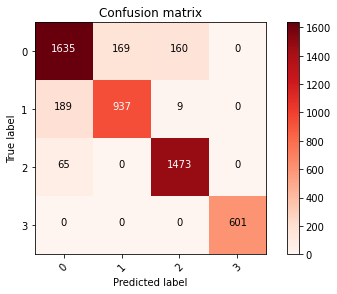

In [ ]:
#confusion matrix
plot_confusion_matrix(cm_sgd, classes)
plt.show()

# Support Vector Machines

In [ ]:
# instantiate the rbf kernel model
rbf = svm.SVC(kernel='rbf', degree=3, C=1, decision_function_shape='ovo').fit(scaled_X_train, y_train)

In [ ]:
# instantiate the sigmoid kernel model
sigmoid = svm.SVC(kernel='sigmoid', degree=3, C=1, decision_function_shape='ovo').fit(scaled_X_train, y_train)

In [ ]:
# instantiate the poly kernel model
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(scaled_X_train, y_train)

In [ ]:
# instantiate the linear kernel model
linear = svm.SVC(kernel='linear', degree=3, C=1, decision_function_shape='ovo').fit(scaled_X_train, y_train)

In [ ]:
# predicting support vector machines train
pred_rbf = rbf.predict(scaled_X_train)
pred_sigmoid =sigmoid.predict(scaled_X_train)
pred_poly = poly.predict(scaled_X_train)
pred_linear = linear.predict(scaled_X_train)

In [ ]:
#get predictions of normalize train data
accuracy_score_rbf = rbf.score(scaled_X_train,y_train)
accuracy_score_sigmoid = sigmoid.score(scaled_X_train,y_train)
accuracy_score_poly = poly.score(scaled_X_train,y_train)
accuracy_score_linear = linear.score(scaled_X_train,y_train)

In [ ]:
# get the Accuracy of train data
print("Accuracy RBF kernel:", accuracy_score_rbf)
print("Accuracy Sigmoid kernel:", accuracy_score_sigmoid)
print("Accuracy Poly kernel:", accuracy_score_poly)
print("Accuracy Linear kernel:", accuracy_score_linear)

Accuracy RBF kernel: 0.9097455200065461
Accuracy Sigmoid kernel: 0.5314622371328042
Accuracy Poly kernel: 0.9182554619098273
Accuracy Linear kernel: 0.8997627035430816


In [ ]:
#highest accuracy score is from accuracy poly kernal
print(classification_report(y_train, pred_poly))


              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4489
           1       0.90      0.80      0.85      2566
           2       0.96      0.97      0.97      3867
           3       1.00      1.00      1.00      1299

    accuracy                           0.92     12221
   macro avg       0.93      0.92      0.93     12221
weighted avg       0.92      0.92      0.92     12221



In [ ]:
# predicting support vector machines
pred_rbf = rbf.predict(scaled_X_test)
pred_sigmoid =sigmoid.predict(scaled_X_test)
pred_poly = poly.predict(scaled_X_test)
pred_linear = linear.predict(scaled_X_test)

In [ ]:
#get Accuracy score of each kernel trick for each model
accuracy_score_rbf = rbf.score(scaled_X_test,y_test)
accuracy_score_sigmoid = sigmoid.score(scaled_X_test,y_test)
accuracy_score_poly = poly.score(scaled_X_test,y_test)
accuracy_score_linear = linear.score(scaled_X_test,y_test)

In [ ]:
# Accuracy of the test models
print("Accuracy RBF kernel:", accuracy_score_rbf)
print("Accuracy Sigmoid kernel:", accuracy_score_sigmoid)
print("Accuracy Poly kernel:", accuracy_score_poly)
print("Accuracy Linear kernel:", accuracy_score_linear)

Accuracy RBF kernel: 0.8972890416189385
Accuracy Sigmoid kernel: 0.5385643375334097
Accuracy Poly kernel: 0.8997709049255441
Accuracy Linear kernel: 0.8951890034364262


In [ ]:
# Confusion matrix of test data
cm_rbf = confusion_matrix(y_test, pred_rbf)
cm_sigmoid = confusion_matrix(y_test, pred_sigmoid)
cm_poly = confusion_matrix(y_test, pred_poly)
cm_linear = confusion_matrix(y_test, pred_linear)

Confusion matrix, without normalization
[[1761  115   88    0]
 [ 244  887    4    0]
 [  87    0 1451    0]
 [   0    0    0  601]]


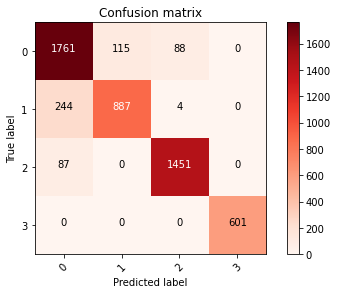

Confusion matrix, without normalization
[[1783    0   90   91]
 [1097    0    0   38]
 [1020    0  496   22]
 [  59    0    0  542]]


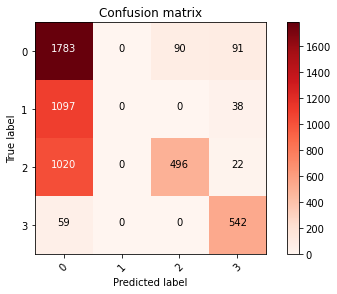

Confusion matrix, without normalization
[[1766  117   81    0]
 [ 237  895    3    0]
 [  86    1 1451    0]
 [   0    0    0  601]]


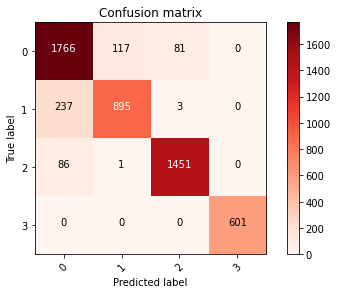

Confusion matrix, without normalization
[[1746  126   92    0]
 [ 226  906    3    0]
 [ 102    0 1436    0]
 [   0    0    0  601]]


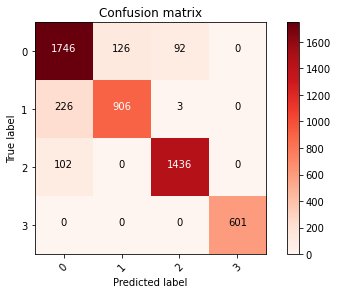

In [ ]:
# Plot the confusion matrices
plot_confusion_matrix(cm_rbf, classes)
plt.show()
plot_confusion_matrix(cm_sigmoid, classes)
plt.show()
plot_confusion_matrix(cm_poly, classes)
plt.show()
plot_confusion_matrix(cm_linear, classes)
plt.show()

#Random Forest

In [ ]:
#Random Forest
#Training data using Random Forest Model

clf = RandomForestClassifier(max_depth = 200, random_state=0)
clf.fit(X_train, y_train)

#predicting using Random forest training
preds_train = clf.predict(X_train)

print(classification_report(y_train, preds_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4489
           1       1.00      1.00      1.00      2566
           2       1.00      1.00      1.00      3867
           3       1.00      1.00      1.00      1299

    accuracy                           1.00     12221
   macro avg       1.00      1.00      1.00     12221
weighted avg       1.00      1.00      1.00     12221



In [ ]:
selected_features = clf.feature_names_in_

In [ ]:
selected_features

array(['Age', 'Potential', 'Wage', 'height', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'dribbling',
       'curve', 'fk_accuracy', 'long_passing', 'ball_control',
       'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'positioning', 'vision', 'penalties', 'composure',
       'defensive_awareness', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'preferred_foot', 'weak_foot', 'skill_move',
       'work_rate', 'body_type_clean'], dtype=object)

In [ ]:
#clf.estimators_

In [ ]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 200,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

Confusion matrix, without normalization
[[4489    0    0    0]
 [   0 2566    0    0]
 [   0    0 3867    0]
 [   0    0    0 1299]]
Normalized confusion matrix
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


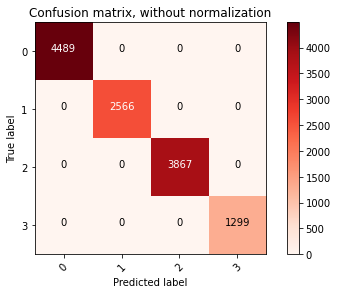

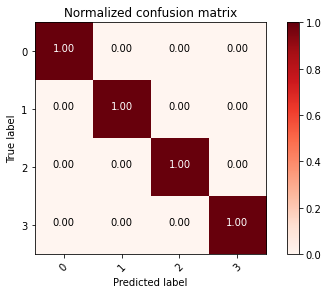

In [ ]:
# Predicting using Random forest
preds = clf.predict(X_test)

#Confusion Matrix on train set
clf_matrix = confusion_matrix(y_train, preds_train)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(clf_matrix, classes=[0,1,2,3],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(clf_matrix, normalize=True,  classes=[0,1,2,3],
                      title='Normalized confusion matrix')

Confusion matrix, without normalization
[[1731  140   93    0]
 [ 227  905    3    0]
 [ 105    0 1433    0]
 [   0    0    0  601]]
Normalized confusion matrix
[[0.88 0.07 0.05 0.  ]
 [0.2  0.8  0.   0.  ]
 [0.07 0.   0.93 0.  ]
 [0.   0.   0.   1.  ]]


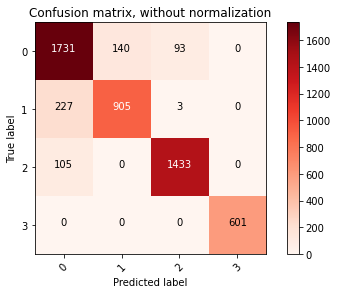

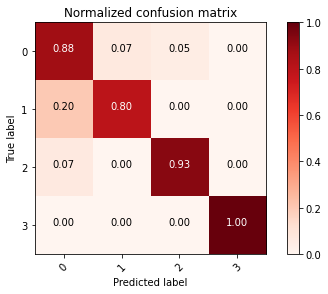

In [ ]:
#Confusion matrix on test set
clf_matrix = confusion_matrix(y_test, preds)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(clf_matrix, classes=[0,1,2,3],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(clf_matrix, normalize=True,  classes=[0,1,2,3],
                      title='Normalized confusion matrix')

In [ ]:
#getting accuracy on train set
clf_3_t = RandomForestClassifier().fit(X_train, y_train)
acc_3_t = clf_3_t.score(X_train, y_train)
print ('Random Forest Accuracy: {}'.format(acc_3_t))

Random Forest Accuracy: 1.0


In [ ]:
#getting accuracy on test set
clf_3 = RandomForestClassifier().fit(X_train, y_train)
acc_3 = clf_3.score(X_test, y_test)
print ('Random Forest Accuracy: {}'.format(acc_3))

Random Forest Accuracy: 0.8928980526918672


In [ ]:
#Random Forest with Grid Search CV

>1, train: 0.607, test: 0.590
>2, train: 0.781, test: 0.779
>3, train: 0.814, test: 0.812
>4, train: 0.840, test: 0.834
>5, train: 0.858, test: 0.849
>6, train: 0.876, test: 0.861
>7, train: 0.894, test: 0.872
>8, train: 0.911, test: 0.881
>9, train: 0.929, test: 0.887
>10, train: 0.947, test: 0.889
>11, train: 0.964, test: 0.893
>12, train: 0.977, test: 0.895
>13, train: 0.988, test: 0.895
>14, train: 0.994, test: 0.896
>15, train: 0.996, test: 0.896
>16, train: 0.998, test: 0.895
>17, train: 0.999, test: 0.896
>18, train: 1.000, test: 0.896
>19, train: 1.000, test: 0.897
>20, train: 1.000, test: 0.897


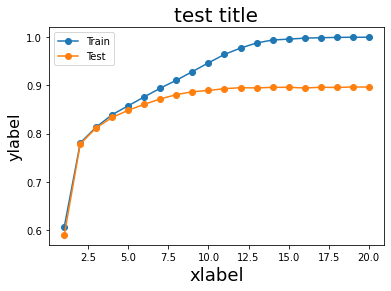

In [ ]:
#source: https://machinelearningmastery.com/overfitting-machine-learning-models/
#checking for ideal max depth before overfitting occurs
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = RandomForestClassifier(n_estimators = 1400,
 min_samples_split = 5,
 min_samples_leaf = 2,
 max_features = 'sqrt',
 max_depth = i,
 bootstrap = False)
 # fit model on the training dataset
 model.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))


In [ ]:
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.title('test title', fontsize=20)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)
pyplot.legend()
pyplot.show()

In [ ]:
#source:
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-
#python-using-scikit-learn-28d2aa77dd74
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 9, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_params_

In [ ]:
#source: Sarkar, D., Bali, R., & Sharma, T. (2018).
#Practical machine learning with python. Springer Science+Business Media 
#New York
importance_scores = rf_random.best_estimator_.feature_importances_
scaled_features_df = pd.DataFrame(X_train, columns=sel.columns)
feature_importances = [(feature, score) for feature, score in zip(scaled_features_df.columns, importance_scores)]
sorted(feature_importances, key=lambda x: -x[1])[:10]

In [ ]:
#predicting using Random forest training
preds_train = rf_random.predict(X_train)

print(classification_report(y_train, preds_train))

In [ ]:
# Predicting using Random forest
preds = rf_random.predict(X_test)

In [ ]:
print(classification_report(y_test, preds))

In [ ]:
#Random Forest
#Training data using Random Forest Model

clf_best = RandomForestClassifier(n_estimators =  1400,
 min_samples_split =  5,
 min_samples_leaf = 2,
 max_features =  'sqrt',
 max_depth = 9,
 bootstrap = False)
clf_best.fit(X_train, y_train)

#predicting using Random forest training
preds_train = clf_best.predict(X_train)
preds_test = clf_best.predict(X_test)

print(classification_report(y_train, preds_train))
print(classification_report(y_test, preds_test))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      4489
           1       0.93      0.83      0.88      2566
           2       0.98      0.95      0.96      3867
           3       1.00      1.00      1.00      1299

    accuracy                           0.93     12221
   macro avg       0.94      0.93      0.94     12221
weighted avg       0.93      0.93      0.93     12221

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1964
           1       0.88      0.79      0.83      1135
           2       0.94      0.91      0.93      1538
           3       1.00      1.00      1.00       601

    accuracy                           0.89      5238
   macro avg       0.91      0.90      0.90      5238
weighted avg       0.89      0.89      0.89      5238



In [ ]:
#source: Sarkar, D., Bali, R., & Sharma, T. (2018).
#Practical machine learning with python. Springer Science+Business Media 
#New York
importance_scores = clf_best.feature_importances_
scaled_features_df = pd.DataFrame(X_train, columns=best_x.columns)
feature_importances = [(feature, score) for feature, score in zip(scaled_features_df.columns, importance_scores)]
sorted(feature_importances, key=lambda x: -x[1])[:10]

[('sliding_tackle', 0.12129016219115216),
 ('standing_tackle', 0.09214634222518432),
 ('defensive_awareness', 0.07979238820545115),
 ('finishing', 0.0651334573317821),
 ('vision', 0.053126901815295016),
 ('heading_accuracy', 0.04590344078306711),
 ('long_passing', 0.04446856849364038),
 ('long_shots', 0.04003361176989141),
 ('volleys', 0.03287059507279965),
 ('crossing', 0.03133504853568795)]

In [ ]:
#Displaying Random Forest Tree
#extracting single tree
features = ['Age', 'Potential', 'Wage', 'height', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'dribbling', 'curve',
       'fk_accuracy', 'long_passing', 'ball_control', 'shot_power', 'jumping',
       'stamina', 'strength', 'long_shots', 'aggression', 'positioning',
       'vision', 'penalties', 'composure', 'defensive_awareness',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'preferred_foot',
       'weak_foot', 'skill_move', 'work_rate', 'body_type_clean']

class_names = ['Midfield', 'Forward', 'Defender', 'Goalkeeper']

estimator = clf_best.estimators_[5]

#Exporting tree as dot file
export_graphviz(estimator, out_file = 'random_forest_tree.dot',
                feature_names = features,
                class_names = class_names,
                rounded = True, proportion = False,
                precision = 2, filled = True)

#converting to png
call(['dot', '-Tpng', 'random_forest_tree.dot', '-o', 'random_forest_tree.png', '-Gdpi=600'])

#Displaying tree
Image(filename = '/content/random_forest_tree.png')

#Logistic Regression

In [ ]:
#Logistic Regression
#Training data using Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train, y_train)


In [ ]:
#prediction on training set
preds_training = lr.predict(X_train)

In [ ]:
#prediction on testing set
preds = lr.predict(X_test)

In [ ]:
#confusion matrix on training
cnf_matrix = confusion_matrix(y_train, preds_training)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True,  classes=[0,1,2,3],
                      title='Normalized confusion matrix')

In [ ]:
cnf_matrix = confusion_matrix(y_test, preds)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True,  classes=[0,1,2,3],
                      title='Normalized confusion matrix')

In [ ]:
# Coefficient significance
Coef_list = list(sorted(zip(X_train.columns, abs(lr.coef_[0])),key=lambda x: -x[1]))
Coef_table = pd.DataFrame(np.array(Coef_list).reshape(-1,2), columns = ['Attributes', 'Coef'])

print(Coef_table)

In [ ]:
# Making predictions using only the top 6 most significant variables
target_cols = Coef_table[:6]['Attributes'].tolist()

clf_2 = LogisticRegression().fit(X_train[target_cols], y_train)
acc_2 = clf_2.score(X_test[target_cols], y_test)
print ('Logistic Regression Accuracy (6 features): {}'.format(acc_2))

In [ ]:
prediction_fit = clf_2.predict(X_train[target_cols])

In [ ]:
print(classification_report(y_train, prediction_fit))

In [ ]:
cnf_matrix = confusion_matrix(y_test, clf_2.predict(X_test[target_cols]))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True,  classes=[0,1,2,3],
                      title='Normalized confusion matrix')

# K-means

In [ ]:
#x y split
clean_dataset(df_soccer)

# Defining Predictors and outcome variable
x = df_soccer.drop(['Position_Category'], axis = 1)
y = df_soccer['Position_Category']

#scaling the data because we use different measures such as height and weight
#source: https://stats.stackexchange.com/questions/89809/is-it-important-to-scale-data-before-clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(x)

In [ ]:
#looking at scaled data
scaled_features[:1]

In [ ]:
# splitting the data 
X_train, X_test, y_train, y_test = train_test_split(scaled_features,
            y,test_size=0.3,random_state=0)

For Elbow Method

In [ ]:
 # A list holds the SSE values for each k
    
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
    
    
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

In [ ]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

In [ ]:
#to help id the elbow
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

Elbow method found that 3 clusters were ideal. However, given that we know that the dataset has 4 positions, we will use 4 clusters

KMeans with init set to random

In [ ]:
#n_clusters set to 4 because we want to cluster 4 positions
#default is lloyd algorithm

kmeans = KMeans(
         init="random",
         n_clusters=4,
         n_init=10,
         max_iter=300,
         random_state=42
    )

In [ ]:
kmeans.fit(X_train)

In [ ]:
#converged at 12 iterations
kmeans.n_iter_

In [ ]:
#lowest SSE value
kmeans.inertia_

In [ ]:
#locations of centeroids
kmeans.cluster_centers_

In [ ]:
#cluster assignments
#this shows the ouputs of the first 4 
#predicted labels
kmeans.labels_[:4]

In [ ]:
#silhouette score
#evalulates the quality of clusters
#source: https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam
#A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters.
kmeans_silhouette = silhouette_score(
    X_train, kmeans.labels_
).round(2)

In [ ]:
kmeans_silhouette

In [ ]:
cm = pd.crosstab(y_train, kmeans.labels_)
print(cm)

In [ ]:
#source: https://stackoverflow.com/questions/64364851/how-to-evaluate-k-means-clustering-since-automatic-indexes-of-clusters-dont-mat
plt.figure(figsize=(30,10))

# plot the heatmap for correlation matrix
ax = sns.heatmap(cm, 
                square=True, annot=True, fmt='.2f')

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0);

In [ ]:
#checking training stats
#source: https://www.freecodecamp.org/news/how-to-build-and-train-k-nearest-neighbors-ml-models-in-python/

In [ ]:
predictions = kmeans.predict(X_train)

In [ ]:
print(classification_report(y_train, predictions))

In [ ]:
print(confusion_matrix(y_train, predictions))

In [ ]:
#predicting test data

In [ ]:
predictions = kmeans.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
print(confusion_matrix(y_test, predictions))

In [ ]:
#keeping entire dataframe labels
#to view graph
#this does not use xtrain and y train data, but rather, the whole dataset
#source:https://datascience.stackexchange.com/questions/48693/perform-k-means-clustering-over-multiple-columns

mapper = DataFrameMapper([(x.columns, StandardScaler())])
scaled_features = mapper.fit_transform(x.copy(), 4)
scaled_features_df = pd.DataFrame(scaled_features, index=x.index, columns=x.columns)

In [ ]:
#source: https://stackoverflow.com/questions/47202182/train-test-split-without-using-scikit-learn
# Shuffle your dataset 
shuffle_df = scaled_features_df.sample(frac=1)

# Define a size for your train set 
train_size = int(0.7 * len(scaled_features_df))

# Split your dataset 
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

In [ ]:
#same for y
shuffle_df = y.sample(frac=1)

# Define a size for your train set 
train_size = int(0.7 * len(y))

# Split your dataset 
train_set_y = shuffle_df[:train_size]
test_set_y = shuffle_df[train_size:]



In [ ]:
train_set['clusters'] = kmeans.fit_predict(train_set)

In [ ]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(train_set)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=train_set['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [ ]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
#comparing above plot (cluster by clusters from kmeans) to plot of kmeans
#of y training set

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(train_set)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=train_set_y, data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

Using K-means ++ to see if results improve
source: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html



In [ ]:
#n_clusters set to 4 because we want to cluster 4 positions
#default is lloyd algorithm

kmeans = KMeans(
         n_clusters=4,
         n_init=10,
         max_iter=300,
         random_state=42
    )

In [ ]:
kmeans.fit(X_train)

In [ ]:
#converged at 13 iterations
kmeans.n_iter_

In [ ]:
#lowest SSE value
kmeans.inertia_

In [ ]:
#silhouette score
#evalulates the quality of clusters
#source: https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam
#A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters.
kmeans_silhouette = silhouette_score(
    X_train, kmeans.labels_
).round(2)

In [ ]:
#silhouetter score does not improve
kmeans_silhouette

#Accuracy of all Models Visual

In [ ]:
#prepare models
models = []
models.append(('MLR', lr))
models.append(('SGD', SGDClassifier()))
models.append(('SVM-rbf', svm.SVC(kernel='rbf', degree=3, C=1, decision_function_shape='ovo')))
models.append(('SVM-sigmoid', svm.SVC(kernel='sigmoid', degree=3, C=1, decision_function_shape='ovo')))
models.append(('SVM-poly', svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo')))
models.append(('SVM-linear', svm.SVC(kernel='linear', degree=3, C=1, decision_function_shape='ovo')))
models.append(('RF', clf))
models.append(('KNN', kmeans))

#evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()